# **KNN**


1.KNN can be used for both classsification and regression task.

2.KNN is a non linear model.

3.KNN is also called lazy algorithm.

4.KNN is uses similarity or distance calculation for classification and regression.(Euclidean/Manhattan)

5.KNN is computationally very expensive.

6.KNN is very easy to implement and interpret.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df["Glucose"].value_counts() #repliacing all the 0 with o wwith nan

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [11]:
df.loc[:,"Glucose":"BMI"] = df.loc[:,"Glucose":"BMI"].replace(0,np.nan)

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


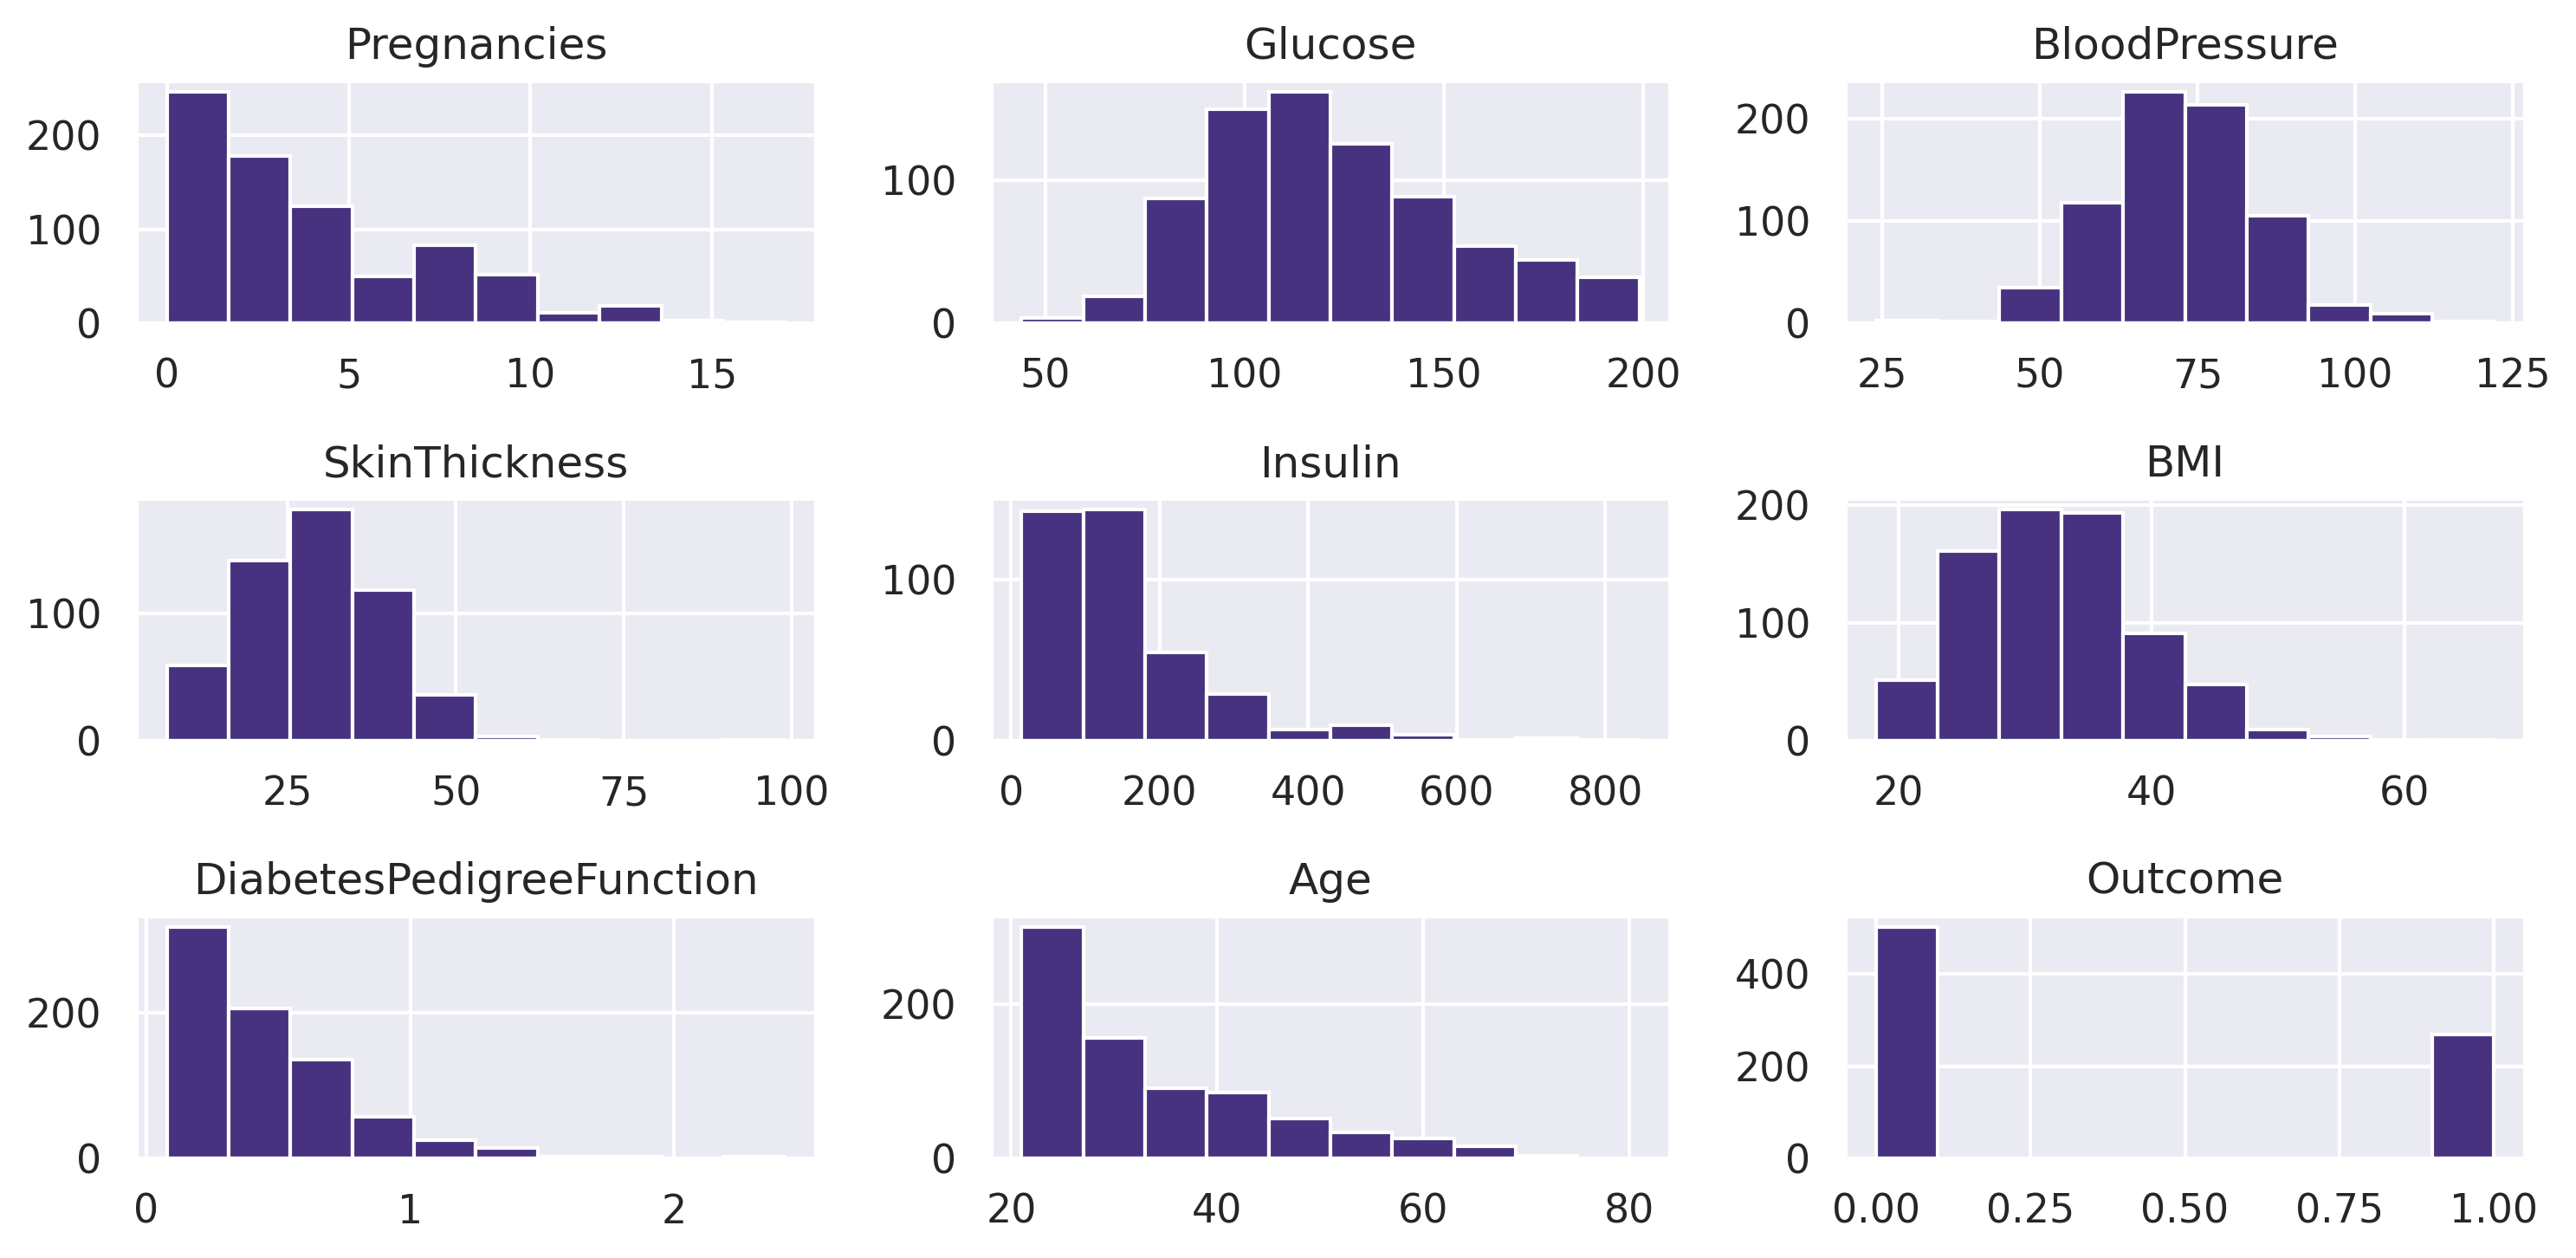

In [14]:
df.hist()
plt.tight_layout()

In [15]:
#missing value
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

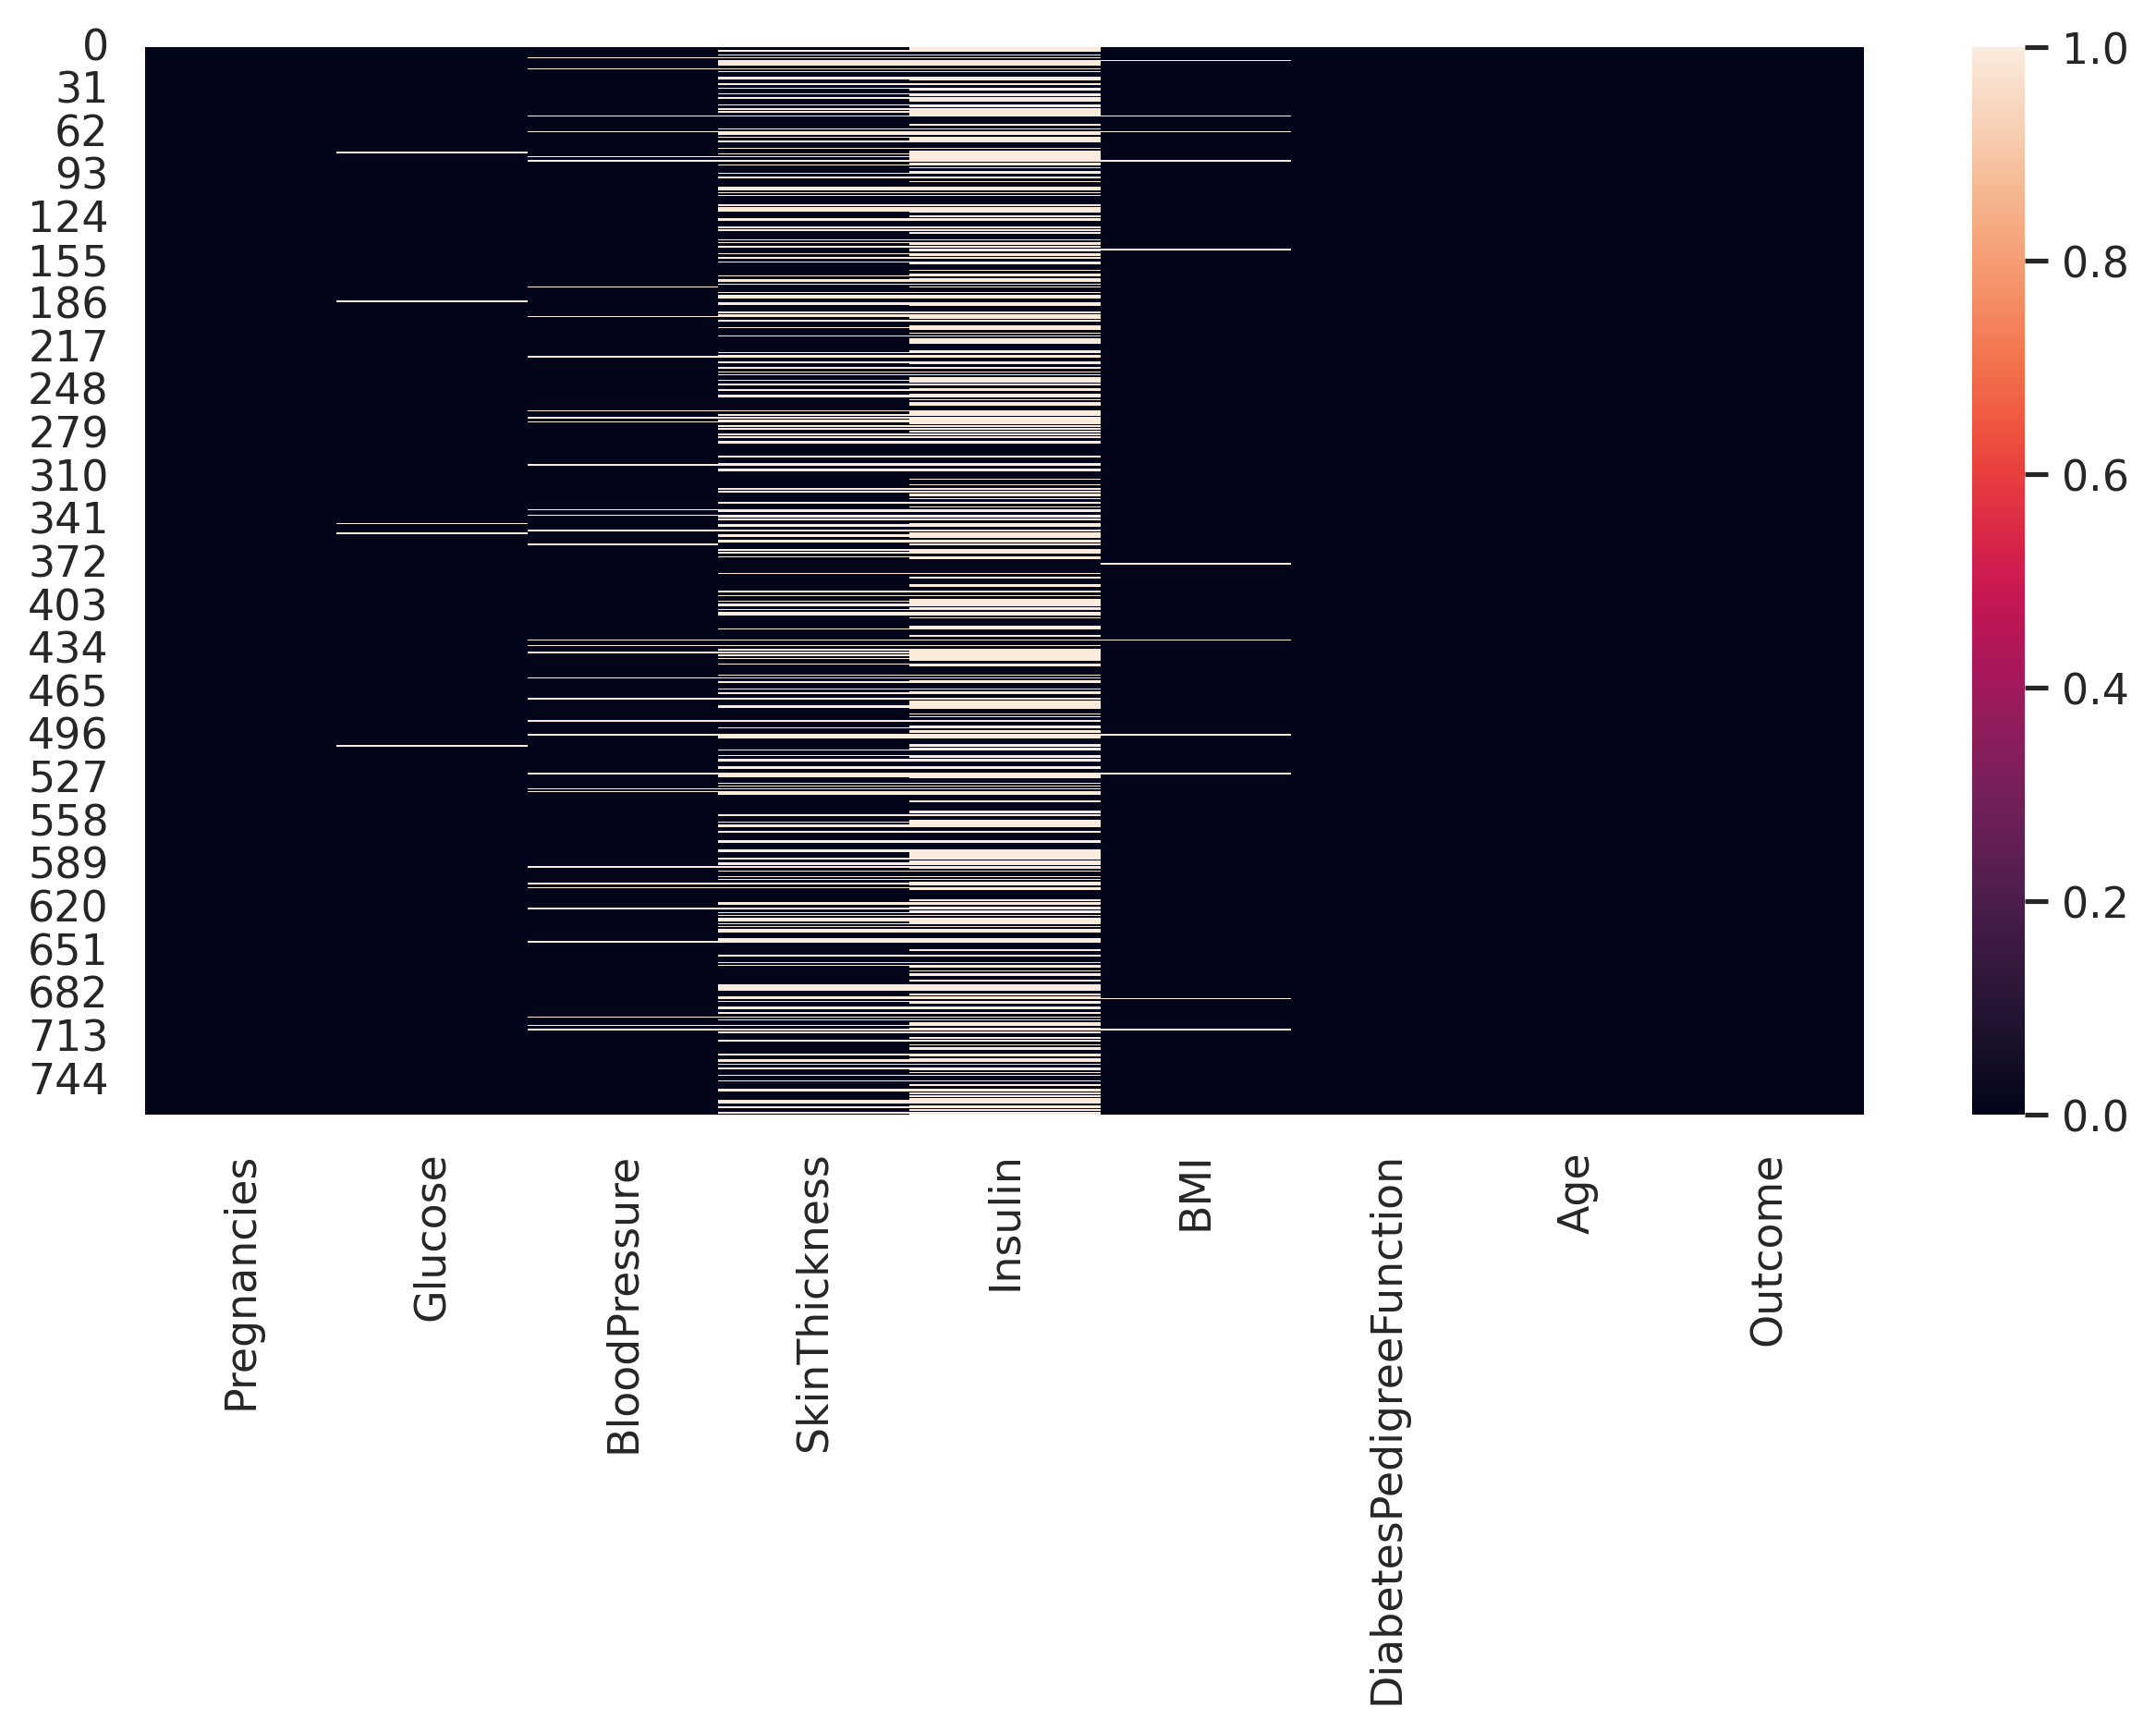

In [17]:
sns.heatmap(df.isna())

In [18]:
#using simple imputer
se = SimpleImputer(strategy="median")
df.loc[:,"Glucose":"BMI"] = se.fit_transform(df.loc[:,"Glucose":"BMI"])
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

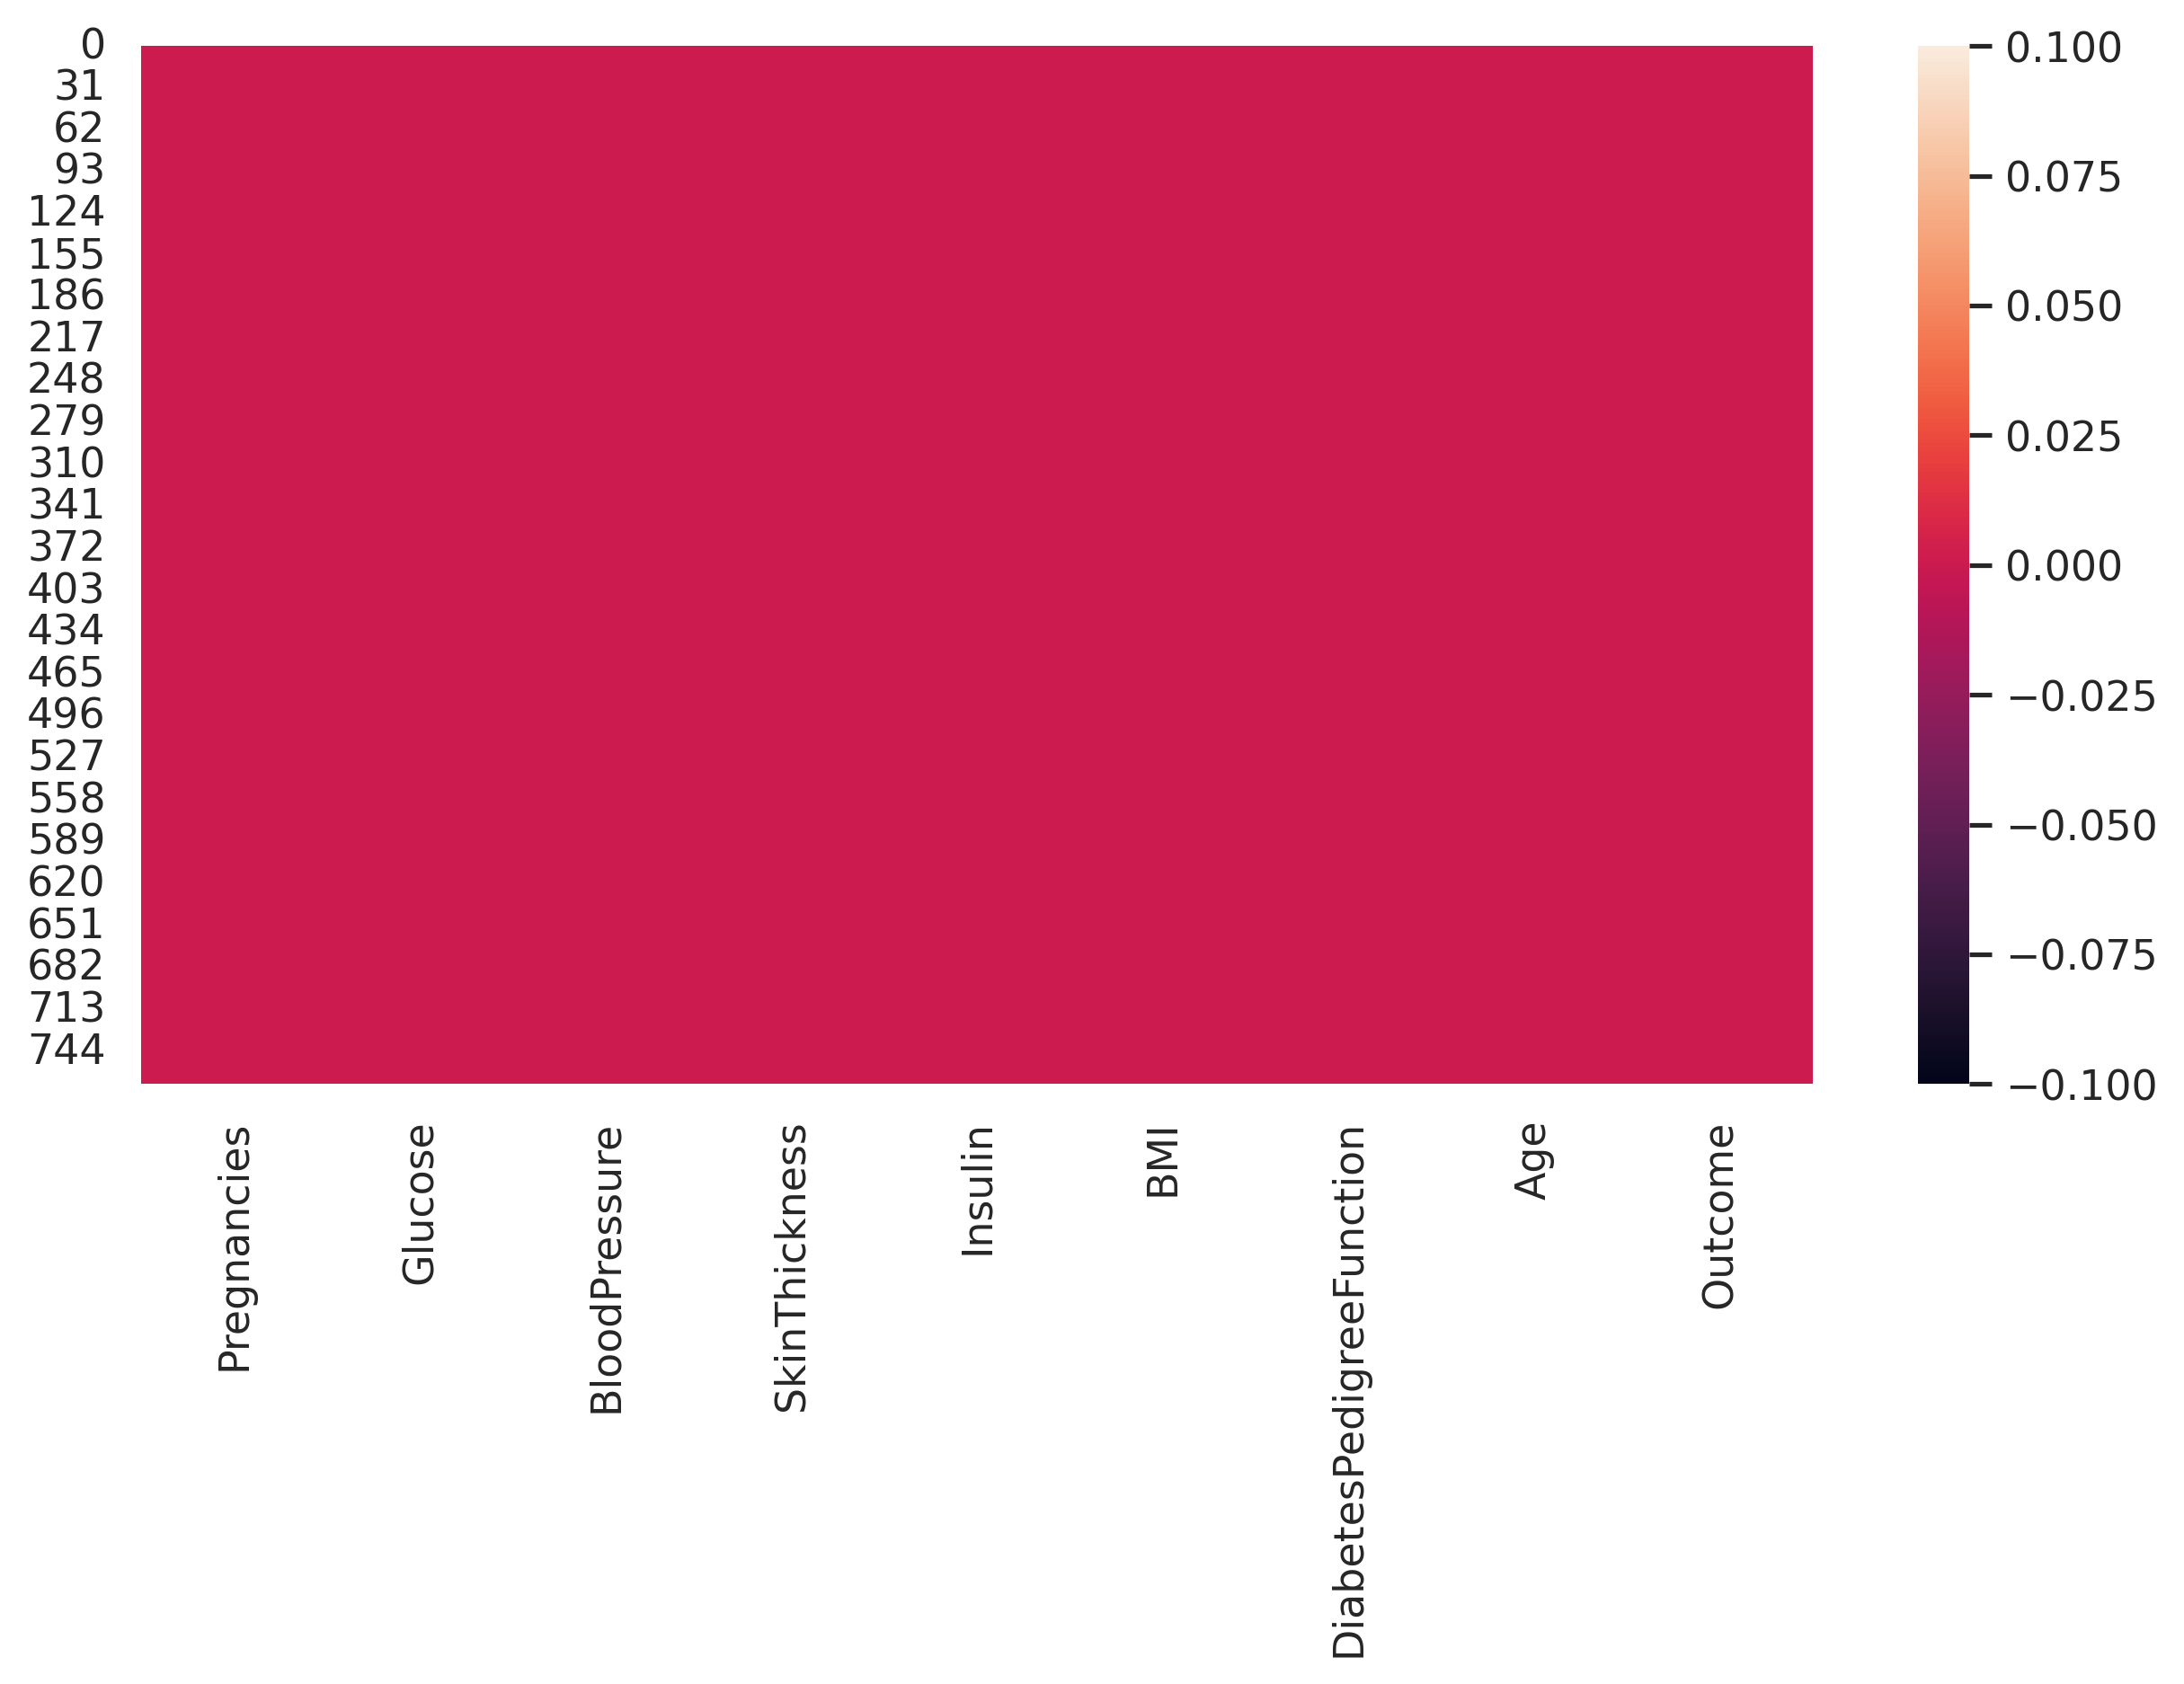

In [19]:
sns.heatmap(df.isna())

# **Model Building**

# **splitting the data**

In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state = 1)

# **Feature Scaling**

In [30]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state = 1)

In [32]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
ypred


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.76      0.64      0.69        69

    accuracy                           0.80       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.79      0.80      0.79       192



In [35]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.8177083333333334, 0.796875)

# **HyperParameter tuning in knn**

In [36]:
trainac = []
testac = []
for i in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(xtrain,ytrain)
  trainac.append(knn.score(xtrain,ytrain))
  testac.append(knn.score(xtest,ytest))

In [37]:
trainac

[1.0,
 0.8368055555555556,
 0.8402777777777778,
 0.8072916666666666,
 0.8177083333333334,
 0.8090277777777778,
 0.7899305555555556,
 0.7986111111111112,
 0.7986111111111112,
 0.7881944444444444,
 0.78125,
 0.7777777777777778,
 0.7864583333333334,
 0.7760416666666666,
 0.7725694444444444,
 0.7690972222222222,
 0.7673611111111112,
 0.7777777777777778,
 0.7673611111111112,
 0.7638888888888888,
 0.765625,
 0.7708333333333334,
 0.7743055555555556,
 0.7690972222222222]

In [38]:
testac

[0.6927083333333334,
 0.7135416666666666,
 0.765625,
 0.7552083333333334,
 0.796875,
 0.765625,
 0.7552083333333334,
 0.734375,
 0.7552083333333334,
 0.75,
 0.78125,
 0.7864583333333334,
 0.7916666666666666,
 0.7916666666666666,
 0.796875,
 0.78125,
 0.7760416666666666,
 0.7760416666666666,
 0.7708333333333334,
 0.7760416666666666,
 0.78125,
 0.78125,
 0.7708333333333334,
 0.78125]

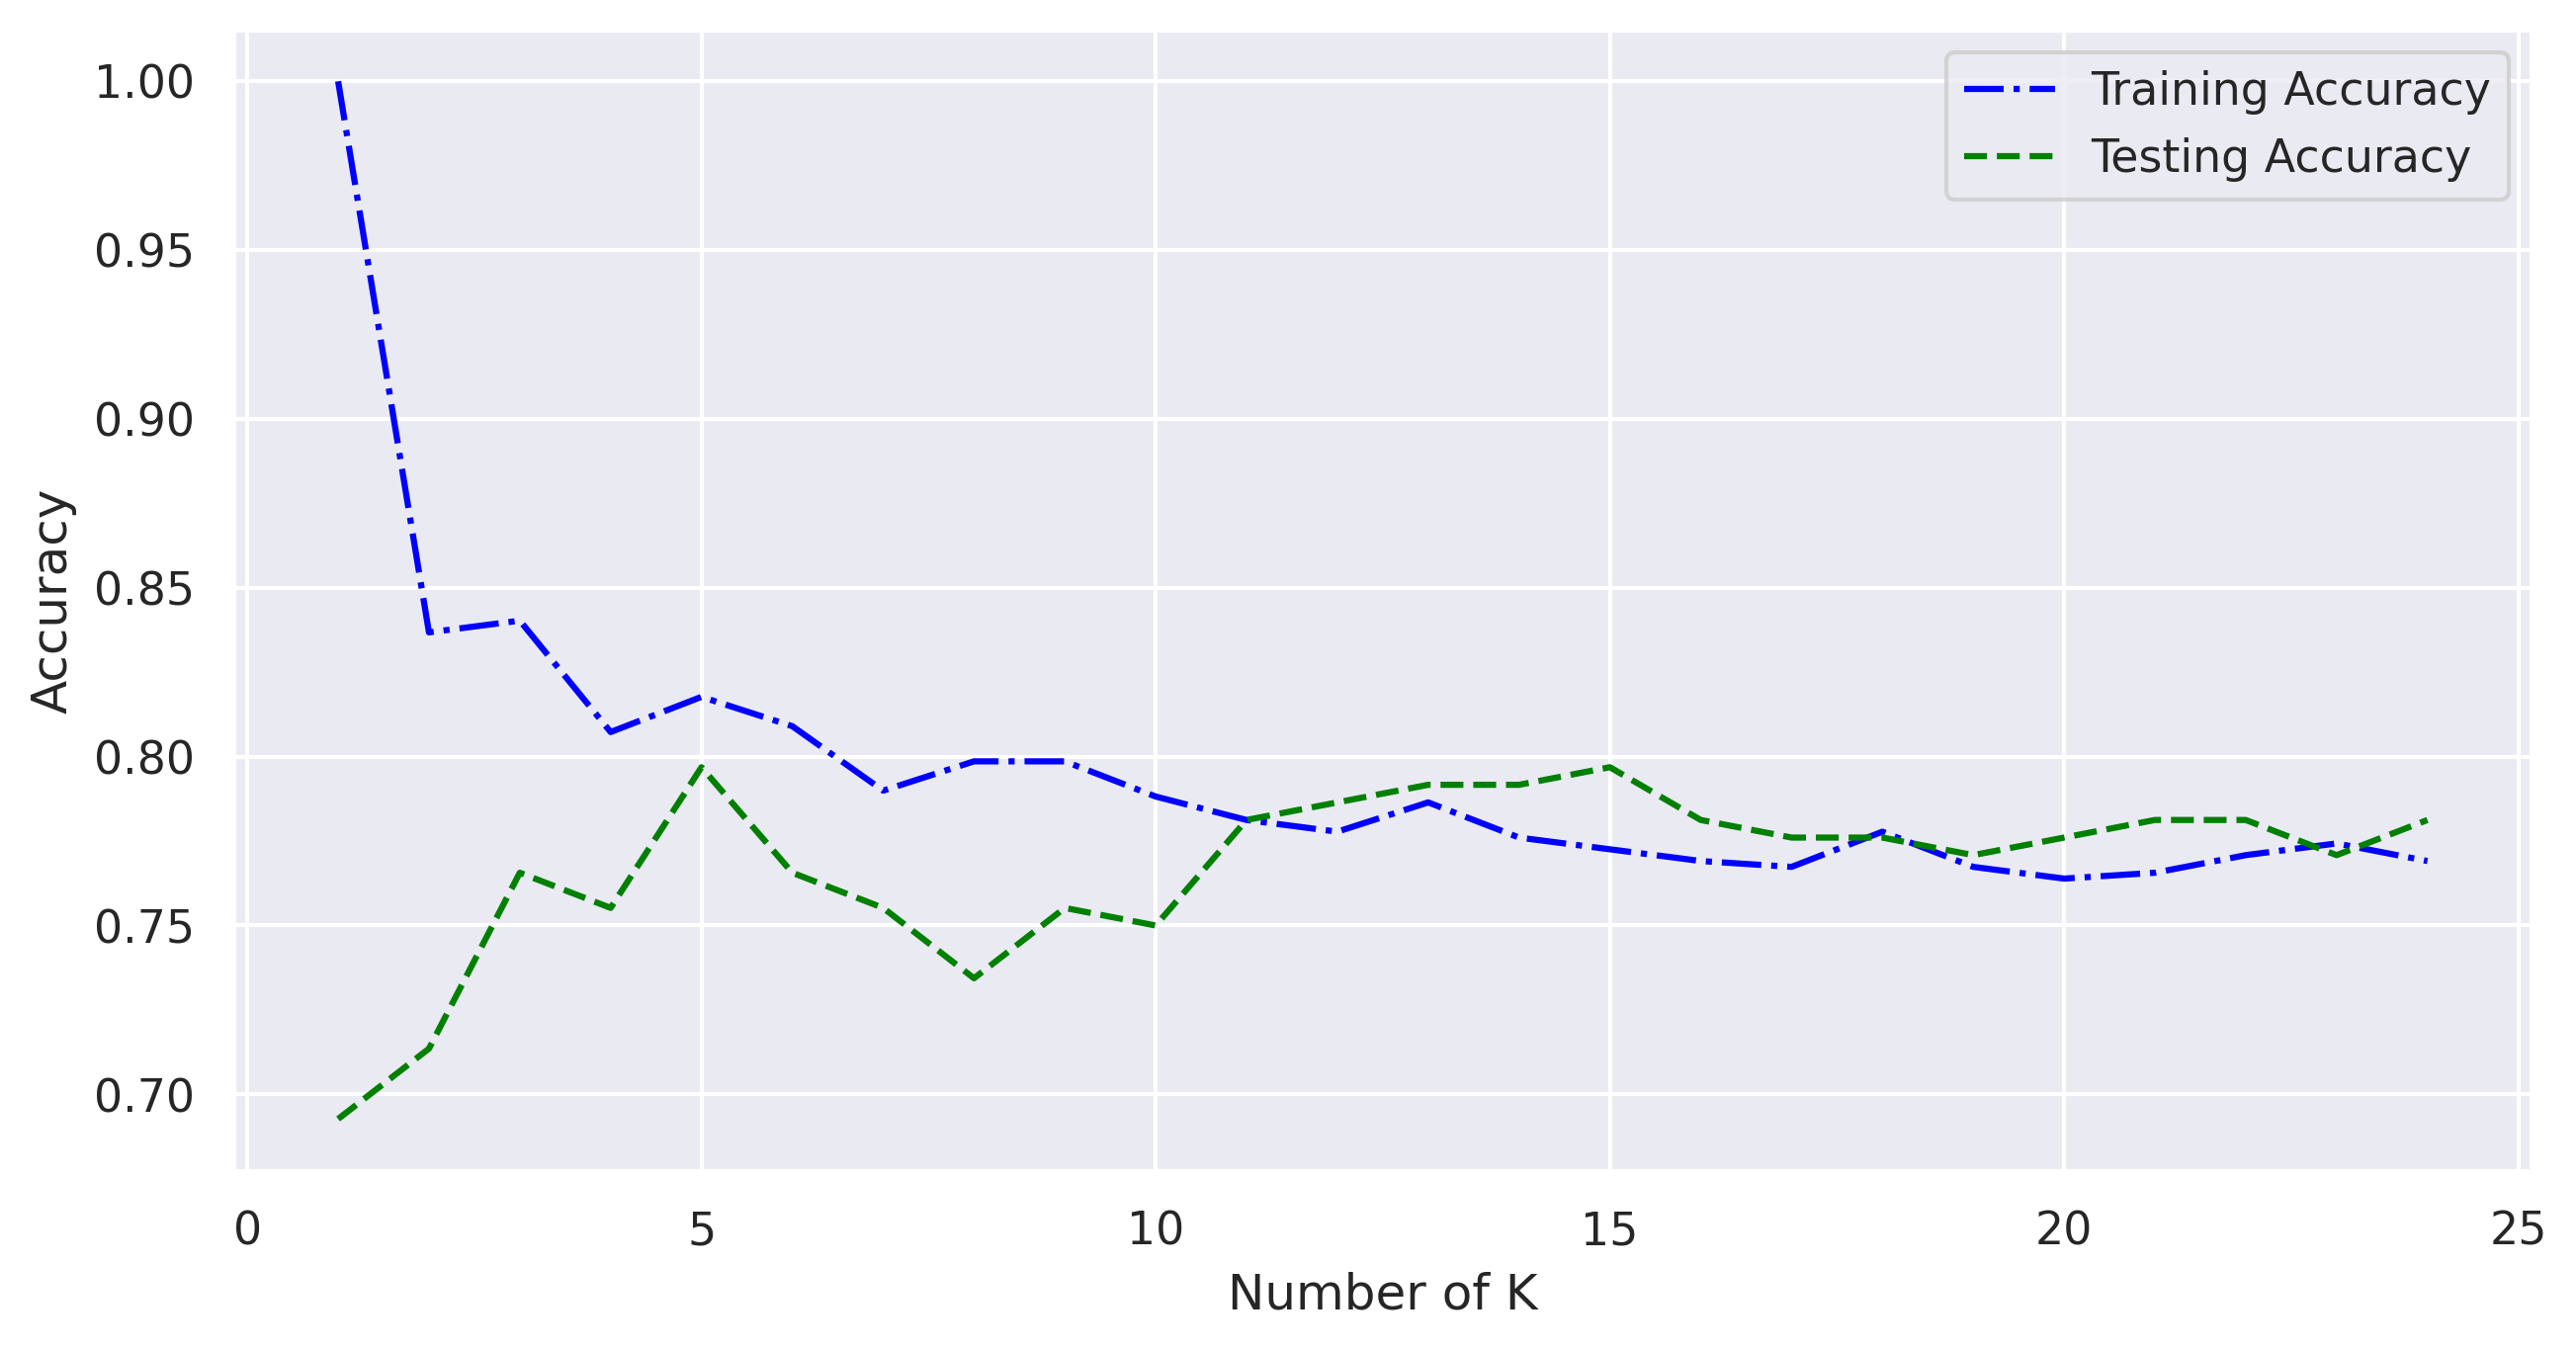

In [41]:
plt.plot(range(1,25), trainac,linestyle = '-.', color = 'blue',label = 'Training Accuracy')
plt.plot(range(1,25),testac, linestyle = '--', color = 'green', label = 'Testing Accuracy')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.legend()

# **Final model**

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain),knn.score(xtest,ytest)


(0.8177083333333334, 0.796875)